## Extract bubble from simulations

In [1]:
cd '/home/dpirvu/project/prefactor/'

/home/dpirvu/project/prefactor


In [2]:
import os,sys
sys.path.append('/home/dpirvu/python_stuff/')
sys.path.append('/home/dpirvu/project/prefactor/plus_bubbles_codes')
sys.path.remove('/home/dpirvu/DarkPhotonxunWISE/hmvec-master')
print(sys.path)
from plotting import *
from bubble_tools import *
from experiment import *
from celluloid import Camera

%matplotlib inline

['/home/dpirvu/project/prefactor', '/cm/shared/apps/python/python37/lib/python37.zip', '/cm/shared/apps/python/python37/lib/python3.7', '/cm/shared/apps/python/python37/lib/python3.7/lib-dynload', '', '/home/dpirvu/.local/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages/IPython/extensions', '/home/dpirvu/.ipython', '/home/dpirvu/python_stuff/', '/home/dpirvu/project/prefactor/plus_bubbles_codes']


In [3]:
def beautify(ax, ttl=None, bb=None, lens=True):
    try:
        len(ax)
    except:
        ax = np.array([ax])
    for ai, aa in enumerate(ax.flatten()):
        aa.grid(which='both', ls=':', color='lightgray', alpha=0.7)
        aa.tick_params(direction='in', which='both', top=True, right=True)
        #aa.ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
        aa.xaxis.set_label_coords(0.5, -0.15)
        aa.yaxis.set_label_coords(-0.15, 0.5)
        aa.xaxis.label.set_color('k')
        aa.yaxis.label.set_color('k')
        aa.tick_params(axis='x', colors='k')
        aa.tick_params(axis='y', colors='k')
        aa.tick_params(direction='in', which='both', bottom=None, left=None, top=None, right=None)
        aa.spines['left'].set_color('k')
        aa.spines['right'].set_color('k')
        aa.spines['top'].set_color('k')
        aa.spines['bottom'].set_color('k')
        if lens:
            aa.legend(title=ttl, bbox_to_anchor=bb, frameon=False, handlelength=1.5, labelspacing=0.3, columnspacing=0.6)
    return ax

def beautify_anim(ax, ttl=None, bb=None):
    try:
        len(ax)
    except:
        ax = np.array([ax])
    for ai, aa in enumerate(ax.flatten()):
        aa.grid(which='both', ls=':', color='lightgray', alpha=0.7)
        aa.tick_params(direction='in', which='both', top=True, right=True)
        aa.xaxis.set_label_coords(0.5, -0.15)
        aa.yaxis.set_label_coords(-0.15, 0.5)
        aa.xaxis.label.set_color('k')
        aa.yaxis.label.set_color('k')
        aa.tick_params(axis='x', colors='k')
        aa.tick_params(axis='y', colors='k')
        aa.tick_params(direction='in', which='both', bottom=None, left=None, top=None, right=None)
        aa.spines['left'].set_color('k')
        aa.spines['right'].set_color('k')
        aa.spines['top'].set_color('k')
        aa.spines['bottom'].set_color('k')
    return ax


In [4]:
%run './plus_bubbles_codes/experiment.py'
case = 'plus'
general = get_general_model(case)
tempList, massq, right_Vmax, V, dV, Vinv, nTimeMAX, minSim, maxSim = general


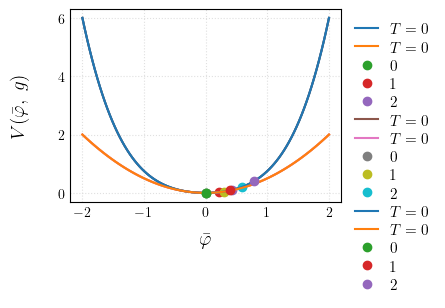

In [5]:
if True:
    philist = np.linspace(-2., 2., 100)
    fig, ax = plt.subplots(1, 1, figsize=(3.5, 2.5))

    for tmp in range(len(tempList)):
        temp, m2, sigmafld = get_model(*general, tmp, case)
        exp_params = np.asarray([nLat, m2, temp])

        ax.plot(philist, V(philist), label=r'$T={:.0f}$'.format(temp))
        ax.plot(philist, 0.5*philist**2., label=r'$T={:.0f}$'.format(temp))
       # ax.plot(philist, 0.5*philist**2., label=r'$T={:.0f}$'.format(temp))
        for nn in np.linspace(0, 2, 3):
            ax.plot(nn*sigmafld, V(nn*sigmafld), 'o', label=r'${:.0f}$'.format(nn))

    ax.set_xlabel(r'$\bar{\varphi}$')
    ax.set_ylabel(r'$V(\bar{\varphi},\; g)$')
    beautify(ax, bb=(1,1))
    plt.savefig('./plots/potential.pdf')
    plt.show()


In [6]:
# check energy time evolution in the free field case
# in initial conditions check potential and kinetic conservation separately, should satisfy equilibrium condition
# in each ensemble as a funciton of temp, total energy should be T*N
# do the same for time evolution of potential and kinetic and check equipartition i.e. KE=PE=TN/2
# check total average energy without short modes
# set momentum and field with different mass over finite low k range


# check exchange between kinetic and potential energy in each mode
# eg: set for i = k1, k2, 1: fld * sqrt(2)

# Initialize at low T momentum modes with effective mass, but the field modes intialize with bare mass, non-equilibrium mass


# check this decay rate as a funciton of courrant number, lattice spacing and box size
# 0.09, 0.095, 0.1
# decat time as tclock + len simulation
# test that the temeprature doesnt time evolve by looking at the effective 
# thermal mass evolution in time; for example can try with concate potential 
# check evolutoin of effective mass at various temepratures up to 0.6; and effective temperatures up to timescales 1e6
# try sinusoidal power spectrum in low k modes

# Check kinetic energy is exactly T/a, potential receives corrections


In [7]:
tmp=0
temp, m2, sigmafld = get_model(*general, tmp, case)
exp_params = np.asarray([nLat, m2, temp])
print('Experiment', exp_params)

sim = 0
path2sim = sim_location(*exp_params, sim)
print(path2sim)

tdecay, initcond, real, outcome = get_realisation(nLat, sim, nTimeMAX, path2sim)
real[np.isnan(real)] = 0.

nC, nT, nN = np.shape(real)
fld, mom, sim_grd = real[0], real[1], real[2]
duration = nT

Experiment [2.048e+03 1.150e+00 1.000e-01]
/gpfs/dpirvu/prefactor/x2048_m2eff1.1500_T0.1000_sim0_fields.dat


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Shapes, (4000, 2048) , (3, 4000, 2048)


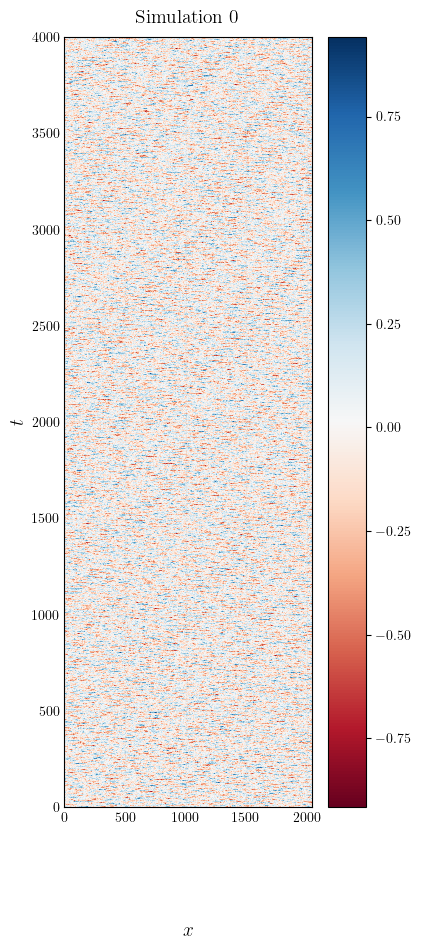

In [8]:
print('Shapes,', np.shape(fld), ',', np.shape(real))
nT, nN = np.shape(fld)

fig, ax = plt.subplots(1,1, figsize = (4, 10))
ext = [0, nN, 0, nT]
im  = ax.imshow(fld, interpolation='none', aspect='auto', extent=ext, origin='lower', cmap='RdBu')
clb = plt.colorbar(im, ax=ax)
for aa in [ax]:
    aa.set_title(r'${{\rm Simulation}} \;{:.0f}$'.format(sim))
    aa.set_xlabel(r'$x$')
    aa.set_ylabel(r'$t$')
beautify(ax)
plt.show()

In [9]:
def direct_fourier(fld, lenLat, nLat):
    nnx = nLat//2+1
    dx  = lenLat/nLat
    dk  = 2.*np.pi/lenLat
    norm = 1./np.sqrt(nLat)
    nyq = nLat//2 + 1

    lattice = np.arange(nLat)
    xlist   = lattice*dx
    klist   = np.roll((lattice - nLat//2+1)*dk, nLat//2+1)[:nyq]
    keffsq  = (2./dx**2.) * (1. - np.cos(klist * dx) )

    expos = np.exp(- 1j * xlist[:,None] * klist[None,:])
    return np.sum(expos[None,...] * fld[...,None], axis=-1) * norm

def inverse_fourier(fftfld, lenLat, nLat):
    nnx = nLat//2+1
    dx  = lenLat/nLat
    dk  = 2.*np.pi/lenLat
    norm = 1./np.sqrt(nLat)

    lattice = np.arange(nLat)
    xlist   = lattice*dx
    klist   = np.roll((lattice - nLat//2+1)*dk, nLat//2+1)[:nyq]
    keffsq  = (2./dx**2.) * (1. - np.cos(klist * dx) )

    expos = np.exp(1j * klist[:,None] * xlist[None,:])
    return np.sum(expos[None,...] * fftfld[...,None], axis=-1) * norm

def get_gradient(fld, lenLat, nLat):
    nnx = nLat//2+1
    dx  = lenLat/nLat
    dk  = 2.*np.pi/lenLat

    lattice = np.arange(nLat)
    klist   = np.roll((lattice - nLat//2+1)*dk, nLat//2+1)
    keffsq  = (2./dx**2.) * (1. - np.cos(klist * dx) )

    fftfldr= np.fft.rfft(fld, axis=-1, norm=None)
    fftgrd = (keffsq[:nLat//2+1]**0.5 * 1.j )[None,:] * fftfldr
    grd = np.fft.irfft(fftgrd, axis=-1, norm=None)
    return fftgrd, grd

def get_laplacian(fld, lenLat, nLat):
    nnx = nLat//2+1
    dx  = lenLat/nLat
    dk  = 2.*np.pi/lenLat

    lattice = np.arange(nLat)
    klist   = np.roll((lattice - nLat//2+1)*dk, nLat//2+1)
    keffsq  = (2./dx**2.) * (1. - np.cos(klist * dx) )

    fftfldr =  np.fft.rfft(fld, axis=-1, norm=None)
    fftlap  = -keffsq[:nLat//2+1][None,:] * fftfldr
    lap     =  np.fft.irfft(fftlap, axis=-1, norm=None)
    return fftlap, lap

def get_simulation_energy(sim, nLat, lenLat):
    nC, nT, nN    = np.shape(real)
    fld, mom = real[0], real[1]

    _, grd = get_gradient(fld, lenLat, nLat)

    KEN_data = dx * np.sum(0.5*mom**2., axis=-1)
    GEN_data = dx * np.sum(0.5*grd**2., axis=-1)
    PEN_data = dx * np.sum(0.5*fld**2. + 0.25*fld**4., axis=-1)
    TEN_data = KEN_data + GEN_data + PEN_data
    return KEN_data, GEN_data, PEN_data, TEN_data

def get_simulation_energy0(sim, nLat, lenLat):
    nC, nT, nN    = np.shape(real)
    fld, mom = real[0], real[1]

    _, grd = get_gradient(fld, lenLat, nLat)

    KEN_data = dx * np.sum(0.5*mom**2., axis=-1)
    GEN_data = dx * np.sum(0.5*((fld - np.roll(fld,1))/dx)**2., axis=-1)
    PEN_data = dx * np.sum(0.5*fld**2. + 0.25*fld**4., axis=-1)
    TEN_data = KEN_data + GEN_data + PEN_data
    return KEN_data, GEN_data, PEN_data, TEN_data


In [10]:
KEN_real, GEN_real, PEN_real, TEN_real = get_simulation_energy(real, nLat, lenLat)
KEN_test, GEN_test, PEN_test, TEN_test = get_simulation_energy0(real, nLat, lenLat)

In [11]:
fftfld = np.fft.rfft(fld, axis=-1, norm=None)
fftmom = np.fft.rfft(mom, axis=-1, norm=None)
fftsimgrd = np.fft.rfft(sim_grd, axis=-1, norm=None)
fftgrd, grd = get_gradient(fld, lenLat, nLat)

fldPS = np.abs(fftfld)**2. / nLat
momPS = np.abs(fftmom)**2. / nLat
grdPS = np.abs(fftgrd)**2. / nLat

KEN_four = dx * np.sum(0.5 * momPS                   , axis=-1)
PEN_four = dx * np.sum(0.5 * fldPS + 0.25 * fldPS**2., axis=-1)
GEN_four = dx * np.sum(0.5 * grdPS                   , axis=-1)
TEN_four = KEN_four + PEN_four + GEN_four


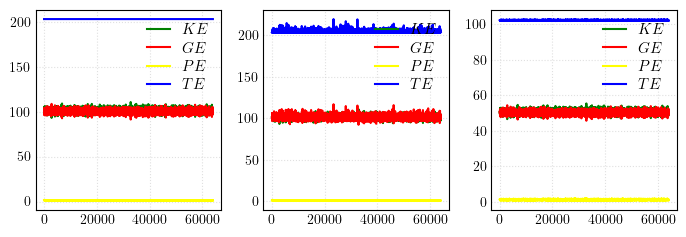

In [12]:
fig, ax = plt.subplots(1,3, figsize = (7,2.5))
#[aa.axhline(temp * nLat / 2, ls=':', color='darkgray') for aa in ax]
#[aa.axhline(temp * nLat, ls=':', color='darkgray') for aa in ax]

tlist = np.arange(len(TEN_real)) * 512 * dtout

ax[0].plot(tlist, KEN_real, label=r'$KE$',  ls='-', color='g')
ax[0].plot(tlist, GEN_real, label=r'$GE$',  ls='-', color='r')
ax[0].plot(tlist, PEN_real, label=r'$PE$',  ls='-', color='yellow')
ax[0].plot(tlist, TEN_real, label=r'$TE$',  ls='-', color='b')

ax[1].plot(tlist, KEN_test, label=r'$KE$',  ls='-', color='g')
ax[1].plot(tlist, GEN_test, label=r'$GE$',  ls='-', color='r')
ax[1].plot(tlist, PEN_test, label=r'$PE$',  ls='-', color='yellow')
ax[1].plot(tlist, TEN_test, label=r'$TE$',  ls='-', color='b')

ax[2].plot(tlist, KEN_four, label=r'$KE$',  ls='-', color='g')
ax[2].plot(tlist, GEN_four, label=r'$GE$',  ls='-', color='r')
ax[2].plot(tlist, PEN_four, label=r'$PE$',  ls='-', color='yellow')
ax[2].plot(tlist, TEN_four, label=r'$TE$',  ls='-', color='b')

#[aa.set_xlabel(r'$t$') for aa in ax]
#ax[1].set_title(r'${{\rm Simulation}}={:.0f}$'.format(sim) + r', $T={:.2f}$'.format(temp))
beautify(ax)
plt.tight_layout()
plt.show()

In [13]:
fftfld = np.zeros((2, 4000, knyq))
fftmom = np.zeros((2, 4000, knyq))
for tmp in [0,1]:
    temp, m2, sigmafld = get_model(*general, tmp, case)
    exp_params = np.asarray([nLat, m2, temp])
    print('Experiment', exp_params)

    sim = 0
    path2sim = sim_location(*exp_params, sim)
    print(path2sim)

    tdecay, initcond, real, outcome = get_realisation(nLat, sim, nTimeMAX, path2sim)
    real[np.isnan(real)] = 0.

    nC, nT, nN = np.shape(real)
    fld, mom, sim_grd = real[0], real[1], real[2]
    duration = nT
    tlist = np.arange(duration) * 512 * dtout

    fftfld[tmp] = np.fft.rfft(fld, axis=-1, norm=None)
    fftmom[tmp] = np.fft.rfft(mom, axis=-1, norm=None)


Experiment [2.048e+03 1.150e+00 1.000e-01]
/gpfs/dpirvu/prefactor/x2048_m2eff1.1500_T0.1000_sim0_fields.dat


/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


Experiment [2.048e+03 1.300e+00 2.000e-01]
/gpfs/dpirvu/prefactor/x2048_m2eff1.3000_T0.2000_sim0_fields.dat


Experiment [2.048e+03 1.150e+00 1.000e-01]
[0.0000e+00 1.6000e+01 3.2000e+01 ... 2.1280e+04 2.1296e+04 2.1312e+04]
[21328. 21344. 21360. ... 42608. 42624. 42640.]
[42656. 42672. 42688. ... 63936. 63952. 63968.]
(4000, 1025) (3, 1025)


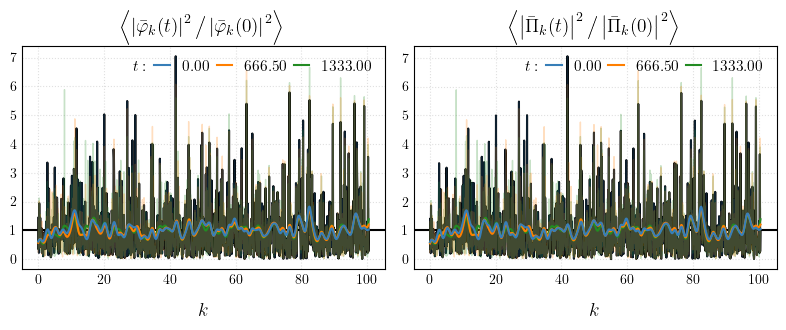

In [18]:
if True:
    clls = allcolors
    for tmp in range(len(tempList)):
        if tmp!=0: continue
        temp, m2, sigmafld = get_model(*general, tmp, case)
        exp_params = np.asarray([nLat, m2, temp])
        labss = r'${:.2f}$'.format(temp)
        print('Experiment', exp_params)

        # modes to plot:
        aa, bb = 1, knyq-1

        tslist = np.linspace(tlist[0], tlist[-1], 4)
        fldPS = np.abs(fftfld[tmp])**2. * 2. / nLat**2.
        momPS = np.abs(fftmom[tmp])**2. * 2. / nLat**2.
        avfldPS, avmomPS = np.zeros((2, len(tslist)-1, knyq))
        for ti, (t1, t2) in enumerate(zip(tslist[:-1], tslist[1:])):
            indxt = (tlist>=t1)&(tlist<t2)
            print(tlist[indxt])
            avfldPS[ti] = np.mean(fldPS[indxt], axis=0)
            avmomPS[ti] = np.mean(momPS[indxt], axis=0)
        tslist = tslist[:-1]

        print(np.shape(momPS), np.shape(avmomPS))

        fig, ax = plt.subplots(1,2, figsize = (8.,3.5))
        ax[0].plot(klist[aa:bb], avfldPS[0, aa:bb]/pspec(temp,m2)[aa:bb], ls='-', color='k')
        ax[1].plot(klist[aa:bb], avmomPS[0, aa:bb]/(w2(m2)*pspec(temp,m2))[aa:bb], ls='-', color='k')

        [aa.axhline(1., ls='-', color='k') for aa in ax]
        for tind, tt in enumerate(reversed(tslist)):
            tind = len(tslist) - 1 - tind

            curve = avfldPS[tind, aa:bb] / pspec(temp,m2)[aa:bb]
            ax[0].plot(klist[aa:bb], curve, ls='-', color=clls[tind], alpha=0.25, lw=1)

            curve = avmomPS[tind, aa:bb] / (w2(m2)*pspec(temp,m2))[aa:bb]
            ax[1].plot(klist[aa:bb], curve, ls='-', color=clls[tind], alpha=0.25, lw=1)

        for tind, tt in enumerate(reversed(tslist)):
            tind  = len(tslist) - 1 - tind
            lab = r'${:.2f}$'.format(tt*dx)

            curve = avfldPS[tind, aa:bb] / pspec(temp,m2)[aa:bb]
            curve = gaussian_filter1d(curve, 6, mode='nearest')
            ax[0].plot(klist[aa:bb], curve, ls='-', color=clls[tind], label=lab)

            curve = avmomPS[tind, aa:bb] / (w2(m2)*pspec(temp,m2))[aa:bb]
            curve = gaussian_filter1d(curve, 6, mode='nearest')
            plt.plot(klist[aa:bb], curve, ls='-', color=clls[tind], label=lab)

        for aa in ax:
            h, l = aa.get_legend_handles_labels() # Extracting handles and labels
            h, l = h[::-1], l[::-1]
            handles = [aa.plot([],marker="", ls="")[0]] + h
            labels = [r'$t:$'] + l  # Merging labels
            leg = aa.legend(handles, labels, ncol=len(tslist)+1, frameon=False, loc=1, handlelength=1., labelspacing=0.3, columnspacing=0.5)
    #    [aa.set_xscale('log') for aa in ax]
        [aa.set_xlabel(r'$k$') for aa in ax]
        ax[0].set_title(r'$\left\langle \left|\bar{\varphi}_k(t)\right|^2 \Big/ \left|\bar{\varphi}_k(0)\right|^2 \right\rangle $')
        ax[1].set_title(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2 \Big/ \left|\bar{\Pi}_k(0)\right|^2 \right\rangle $')
        beautify(ax, lens=False)
        plt.tight_layout()
        plt.savefig('./plots/powespec_tevol.pdf')
        plt.show()

1.15 [1.12695514]
1.15 [1.07913769]
1.15 [1.09216603]


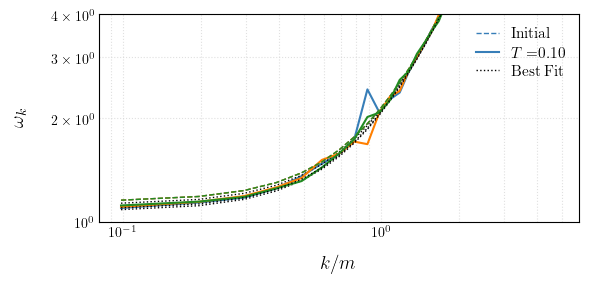

1.3 [1.14393403]
1.3 [1.30828557]
1.3 [1.28136664]


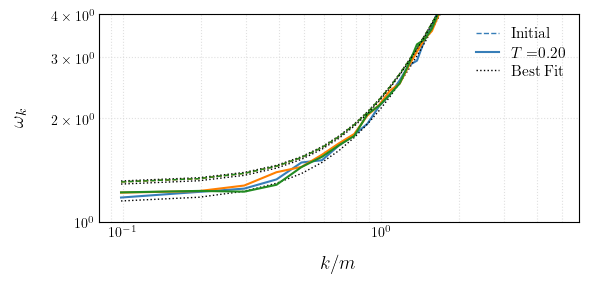

In [22]:
if True:
    save_meff = []
    for tmp in range(len(tempList)):
        if tmp==2: continue

        fig, ax = plt.subplots(1, 1, figsize = (6,3.))
        cols=cycle(allcolors)
        save_meff.append([])

        temp, m2, sigmafld = get_model(*general, tmp, case)
        exp_params = np.asarray([nLat, m2, temp])
        labs = r'${:.2f}$'.format(temp)

        # modes to plot:
        indmax = np.arange(len(klist))[(klist>0.)&(klist<=5.)][-1]
        aa, bb = 1, indmax

        tslistshort = np.linspace(tlist[0], tlist[-1], 4)
        tslistshort2= np.linspace(tlist[0], tlist[-1], 4)
        fldPS = np.abs(fftfld[tmp])**2. * 2. / nLat**2.
        momPS = np.abs(fftmom[tmp])**2. * 2. / nLat**2.

        avfldPS, avmomPS = np.zeros((2, len(tslistshort)-1, knyq))
        for ti, (t1, t2) in enumerate(zip(tslistshort[:-1], tslistshort[1:])):
            indxt = (tlist>=t1)&(tlist<t2)
            avfldPS[ti] = np.mean(fldPS[indxt], axis=0)
            avmomPS[ti] = np.mean(momPS[indxt], axis=0)
        tslistshort = tslistshort[:-1]
        curve = (avmomPS/avfldPS)[:,aa:bb]
        ks = klist[aa:bb]

        ct = 0
        for tind, tt in enumerate(reversed(tslistshort)):
            col = next(cols)
            tind  = len(tslistshort) - 1 - tind
            lab = r'${:.2f}$'.format(tt*dx)

            w2m = lambda ks, m2: m2 + (2./dx**2.) * (1. - np.cos(ks * dx))
            pred_fit = lambda x, data: sco.curve_fit(w2m, x, data)

            plt.plot(ks, w2m(ks, m2), ls='--', lw=1, color=col, label=(r'$\rm Initial$' if ct==0 else None))
            plt.plot(ks, curve[tind], ls='-', color=col, label=(r'$T=$'+labs if ct==0 else None))

            best_ps, _ = pred_fit(ks, curve[tind])
            save_meff[tmp].append(best_ps[0])
            print(m2, best_ps)
            plt.plot(ks, w2m(ks, *best_ps), color='k', ls=':', lw=1, label=(r'$\rm Best \; Fit$' if ct==0 else None))
            ct+=1

        beautify(ax, bb=(1,1))
        ax.set_ylim((1,4))
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_ylabel(r'$\omega_k$')
        ax.set_xlabel(r'$k/m$')
        plt.tight_layout()
        plt.show()

In [1]:
# thermalization of long modes for posivive potential
# mass trend with T^2 for posivive potential
# check convergence trend with courant number should be 10 in the slope for posivive potential
# decay rate T=0.1, 0.11, 0.12 for negativ epotential
# sphaleron reconstructions


The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [26]:
lattice = np.arange(nLat)
xlist   = lattice*dx
klist   = np.roll((lattice - nLat//2+1)*dk, nLat//2+1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


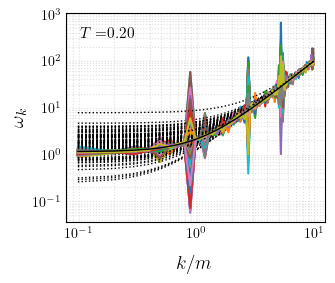

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


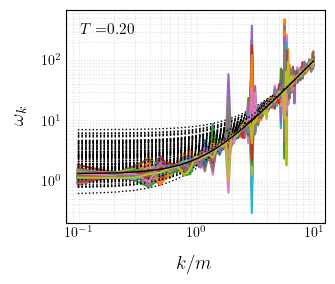

In [96]:
if True:
    meff_func_t = []
    for tmp in range(len(tempList)):
        if tmp==2: continue
        
        temp, m2, sigmafld = get_model(*general, tmp, case)
        exp_params = np.asarray([nLat, m2, temp])
        labs = r'${:.2f}$'.format(temp)

        meff_func_t.append([])

        # modes to plot:
        indmax = np.arange(len(klist))[(klist>0.)&(klist<=10.)][-1]
        aa, bb = 1, indmax

        tslist = np.linspace(tlist[0], tlist[-1], 100)
        fldPS = np.abs(fftfld[tmp])**2.
        momPS = np.abs(fftmom[tmp])**2.

        curve = np.zeros((len(tslist)-1, bb-aa))
        for ti, (t1, t2) in enumerate(zip(tslist[:-1], tslist[1:])):
            indxt = (tlist>=t1)&(tlist<t2)
            curve[ti] = (np.mean(momPS[indxt], axis=0)/np.mean(fldPS[indxt], axis=0))[aa:bb]
        tslist = tslist[:-1]
        ks = klist[aa:bb]

        fig, ax = plt.subplots(1, 1, figsize = (3.5,3.))
        for tind, tt in enumerate(tslist):
            slice = curve[tind]
            plt.plot(ks, slice, ls='-')

            w2m = lambda ks, m2: m2 + (2./dx**2.) * (1. - np.cos(ks * dx))
            m2fit = sco.curve_fit(w2m, ks, slice)[0][0]
            meff_func_t[tmp].append([tt, m2fit])
            plt.plot(ks, w2m(ks, m2fit), color='k', ls=':', lw=1)
        plt.plot(ks, w2m(ks, m2), ls='-', lw=1, color='k')

        beautify(ax, ttl=r'$T=$'+labss)
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_ylabel(r'$\omega_k$')
        ax.set_xlabel(r'$k/m$')
        plt.tight_layout()
        plt.show()

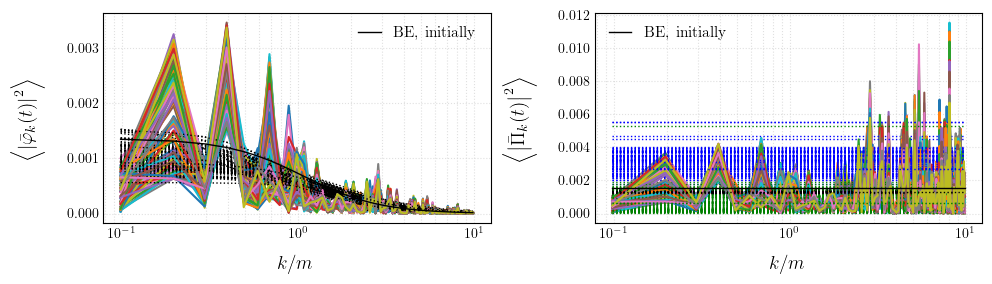

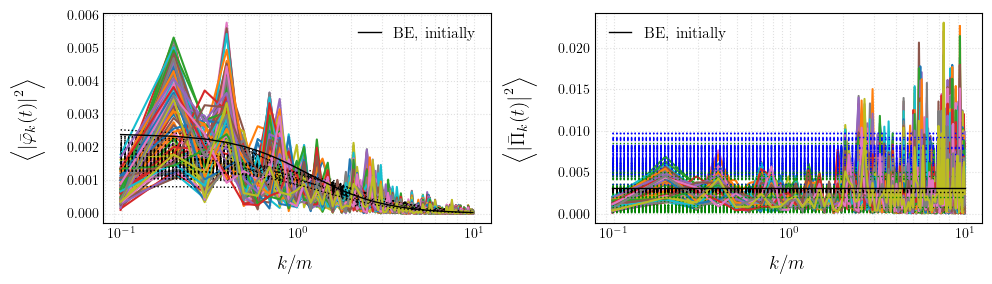

In [114]:
if True:
    teff_func_t, teff_from_mom_lower_bound, teff_from_mom_upper_bound, teff_func_t_from_mom = [], [], [], []

    for tmp in range(len(tempList)):
        if tmp==2: continue
        
        temp, m2, sigmafld = get_model(*general, tmp, case)
        exp_params = np.asarray([nLat, m2, temp])
        labss = r'${:.2f}$'.format(temp)

        teff_func_t.append([])
        teff_from_mom_lower_bound.append([])
        teff_from_mom_upper_bound.append([])
        teff_func_t_from_mom.append([])

        # modes to plot:
        indmax = np.arange(len(klist))[(klist>0.)&(klist<=10.)][-1]
        aa, bb = 1, indmax

        tslist = np.linspace(tlist[0], tlist[-1], 100)
        fldPS = np.abs(fftfld[tmp])**2. * 2. / nLat**2.
        momPS = np.abs(fftmom[tmp])**2. * 2. / nLat**2.

        avfldPS, avmomPS = np.zeros((2, len(tslist)-1, knyq))
        for ti, (t1, t2) in enumerate(zip(tslist[:-1], tslist[1:])):
            indxt = (tlist>=t1)&(tlist<t2)
            avfldPS[ti] = np.mean(fldPS[indxt], axis=0)
            avmomPS[ti] = np.mean(momPS[indxt], axis=0)
        tslist = tslist[:-1]
        curve = (avmomPS/avfldPS)[:,aa:bb]
        ks = klist[aa:bb]

        w2m    = lambda ks, m2: m2 + (2./dx**2.) * (1. - np.cos(ks * dx))
        pofldk = lambda te,ks,m2: te / lenLat / w2m(ks, m2)
        pomomk = lambda te,ks,m2: te / lenLat / w2m(ks, m2) * w2m(ks, m2)

        fig, ax = plt.subplots(1,2, figsize = (10.,3.))
        for tind, tt in enumerate(tslist):
            if tind!=0:
                pspecfd = lambda ks, te: pofldk(te, ks, meff_func_t[tmp][tind][1])
                pspecmm = lambda ks, te: pomomk(te, ks, meff_func_t[tmp][tind][1])
            else:
                pspecfd = lambda ks, te: pofldk(te, ks, m2)
                pspecmm = lambda ks, te: pomomk(te, ks, m2)
            pred_fit_fd = lambda x, data: sco.curve_fit(pspecfd, x, data)
            pred_fit_mm = lambda x, data: sco.curve_fit(pspecmm, x, data)

            curve = avfldPS[tind,aa:bb]
            ax[0].plot(ks, curve, ls='-')

            best_ps, _ = pred_fit_fd(ks, curve)
            teff_func_t[tmp].append([tt, best_ps[0]])
            ax[0].plot(ks, pspecfd(ks, *best_ps), color='k', lw=1, ls=':')

            curve = avmomPS[tind,aa:bb]
            ax[1].plot(ks, curve, ls='-')

            best_ps, _ = pred_fit_mm(ks, curve)
            teff_func_t_from_mom[tmp].append([tt, best_ps[0]])
            ax[1].plot(ks, pspecmm(ks, *best_ps), color='k', lw=1, ls=':')

            cm = np.argmin(curve)
            cm1, cm2 = max(cm-1, 0), min(cm+2, len(ks))
            best_ps, _ = pred_fit_mm(ks[cm1:cm2], curve[cm1:cm2])
            teff_from_mom_lower_bound[tmp].append([tt, best_ps[0]])
            ax[1].plot(ks, pspecmm(ks, *best_ps), color='g', lw=1, ls=':')

            dm = np.argmax(curve)
            dm1, dm2 = max(dm-1, 0), min(dm+2, len(ks))
            best_ps, _ = pred_fit_mm(ks[dm1:dm2], curve[dm1:dm2])
            teff_from_mom_upper_bound[tmp].append([tt, best_ps[0]])
            ax[1].plot(ks, pspecmm(ks, *best_ps), color='b', lw=1, ls=':')

        ax[0].plot(ks, pofldk(temp, ks, m2), color='k', lw=1, ls='-', label=r'$\rm BE, \; initially$')
        ax[1].plot(ks, pomomk(temp, ks, m2), color='k', lw=1, ls='-', label=r'$\rm BE, \; initially$')

        leg = ax[0].legend(title=r'$T={:.2f}$'.format(temp), ncol=1, frameon=False, loc='best')
        ax[0].set_xscale('log')
        ax[0].set_ylabel(r'$\left\langle \left|\bar{\varphi}_k(t)\right|^2 \right\rangle $')
        ax[0].set_xlabel(r'$k/m$')

        leg = ax[1].legend(title=r'$T={:.2f}$'.format(temp), ncol=1, frameon=False, loc='best')
        ax[1].set_xscale('log')
        ax[1].set_ylabel(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2 \right\rangle $')
        ax[1].set_xlabel(r'$k/m$')

        beautify(ax)
        plt.tight_layout()
        plt.show()


In [115]:
save_meff = np.array(save_meff)
meff_func_t = np.array(meff_func_t)
teff_func_t = np.array(teff_func_t)
teff_from_mom_lower_bound = np.array(teff_from_mom_lower_bound)
teff_from_mom_upper_bound = np.array(teff_from_mom_upper_bound)
teff_func_t_from_mom = np.array(teff_func_t_from_mom)

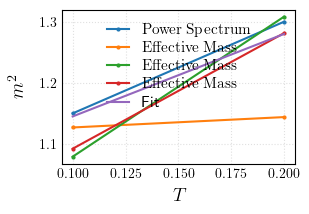

In [116]:
tempListtest = tempList[:-1]

fig, ax = plt.subplots(1,1, figsize = (3,2))
plt.plot(tempListtest, massq(tempListtest), 'o-', ms=2, label=r'$\rm Power \; Spectrum$')
plt.plot(tempListtest, save_meff, 'o-', ms=2, label=r'$\rm Effective \; Mass$')
plt.plot(tempListtest, massq(tempListtest) - 0.5*tempListtest**2., label='Fit')
beautify(ax)
plt.ylabel(r'$m^2$')
plt.xlabel(r'$T$')
plt.show()

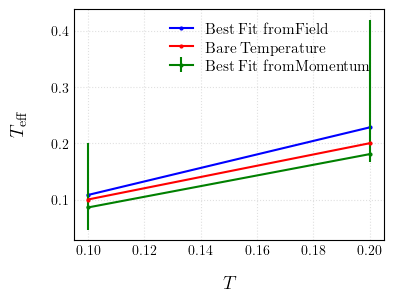

In [117]:
fig, ax = plt.subplots(1,1, figsize = (4,3))
plt.plot(tempListtest, np.mean(teff_func_t[:,:,1], axis=-1), color='b', marker='o', ls='-', ms=2, label=r'$\rm Best \; Fit \; from Field$')

av_teff_from_mom = np.mean(teff_func_t_from_mom[:,:,1], axis=-1)
asymmetric_error = [av_teff_from_mom - np.mean(teff_from_mom_lower_bound[:,:,1], axis=-1), \
                    np.mean(teff_from_mom_upper_bound[:,:,1], axis=-1) - av_teff_from_mom]
plt.errorbar(tempListtest, av_teff_from_mom, yerr=asymmetric_error, color='g', marker='o', ls='-', ms=2, label=r'$\rm Best \; Fit \; from Momentum$')

plt.plot(tempListtest, tempListtest, color='r', marker='o', ls='-', ms=2, label=r'$\rm Bare \; Temperature$')
beautify(ax, bb=(1,1))
plt.ylabel(r'$T_{\rm eff}$')
plt.xlabel(r'$T$')
plt.show()


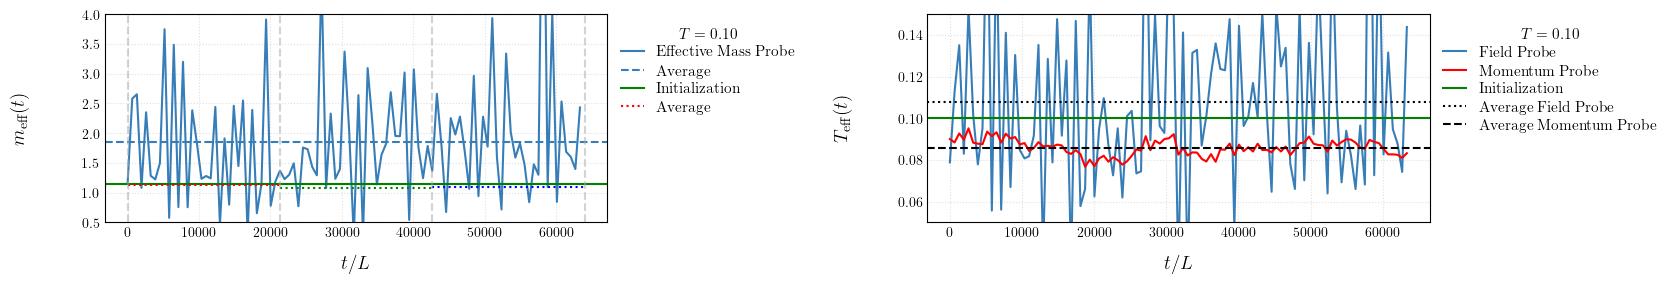

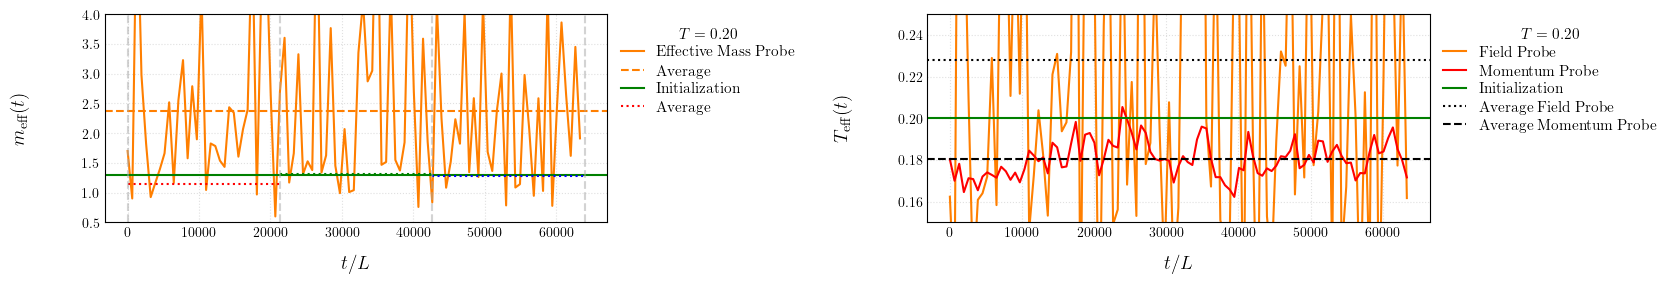

In [125]:
cls = cycle(allcolors[:4])
for tmp, temp in enumerate(tempListtest):
    temp, m2, sigmafld = get_model(*general, tmp, case)
    exp_params = np.asarray([nLat, m2, temp])

    fig, ax = plt.subplots(1,2, figsize = (17,3))
    col = next(cls)

    effmass = meff_func_t[tmp,:,1]
    efftemp_fld = teff_func_t[tmp,:,1]
    efftemp_mom = teff_func_t_from_mom[tmp,:,1]
    efftemp_mom_errl = teff_from_mom_lower_bound[tmp,:,1]
    efftemp_mom_erru = teff_from_mom_upper_bound[tmp,:,1]

    ax[0].plot(tslist, effmass, color=col, label=r'$\rm Effective \; Mass \; Probe$')
    ax[0].axhline(np.mean(effmass), color=col, ls='--', label=r'$\rm Average$')
    ax[0].axhline(m2              , color='g', ls='-', label=r'$\rm Initialization$')
    ax[0].set_ylabel(r'$m_{\rm eff}(t)$')
    ax[0].set_xlabel(r'$t/L$')

    [ax[0].plot(np.linspace(tslistshort2[ii],tslistshort2[ii+1],10), np.ones(10)*save_meff[tmp][ii], color=['r','g','b'][ii], ls=':', label=(r'$\rm Average $' if ii==0 else None))for ii in range(len(tslistshort))]
    [ax[0].axvline(tslistshort2[ii], color='darkgray', alpha=0.5, ls='--') for ii in range(len(tslistshort2))]

 #  l1 = ax[1].fill_between(tslist, efftemp_mom_errl, efftemp_mom_erru, color=col, alpha=0.2)
    l2,= ax[1].plot(tslist, efftemp_fld, color=col, ls='-', label=r'$\rm Field \; Probe$')
    ax[1].plot(tslist, efftemp_mom, color='r', ls='-', label=r'$\rm Momentum \; Probe$')
    ax[1].axhline(temp                , color='g', ls='-', label=r'$\rm Initialization$')
    ax[1].axhline(np.mean(efftemp_fld), color='k', ls=':', label=r'$\rm Average \; Field \; Probe$')
    ax[1].axhline(np.mean(efftemp_mom), color='k', ls='--', label=r'$\rm Average \; Momentum \; Probe$')

    ax[0].set_ylim(0.5,4)
    ax[1].set_ylim(temp-0.05,temp+0.05)
   # ax[1].set_yscale('log')
    ax[1].set_ylabel(r'$T_{\rm eff}(t)$')
    ax[1].set_xlabel(r'$t/L$')
    beautify(ax, ttl=r'$T={:.2f}$'.format(temp), bb=(1,1))
    plt.tight_layout()
    plt.show()

In [ ]:
noamin = False
if noamin:
    fig, ax = plt.subplots(1,1, figsize = (5.,2.7))
    camera = Camera(fig)
    nT, nN = np.shape(fld)
    for tind, tt in enumerate(np.arange(0, nT, 2)):

        ls = plt.plot(np.arange(nN)*dx, fld[tt], ls='-', color=allcolors[0], lw=1)
        ax.axhline(0., ls=':', color='k', lw=0.5)
        ax.set_xlabel(r'$r$')
        ax.set_ylabel(r'$\bar{\varphi}(r)$')
        beautify_anim(ax)
        plt.legend(ls, [r'$t = {:.1f}$'.format(round(tt*dx,1))], loc=1,\
                  frameon=False, handlelength=1.5, labelspacing=0.3, columnspacing=0.6)
        plt.tight_layout()
        camera.snap()
    animation = camera.animate(interval = 0.0001);
    animation.save('./plots/animation_simulation_unbounded.gif', writer = 'imagemagick')


In [ ]:
if False:
    for tmp, temp in enumerate(tempList):
        temp, m2, sigmafld = get_model(*general, tmp, case)
        exp_params = np.asarray([nLat, m2, temp])

        tlist = np.arange(duration)
        ALL_toten = np.load(toten_tlist_file(*exp_params, minSim, maxSim))
        ALL_emt   = np.load(emt_tlist_file(*exp_params, minSim, maxSim))
        for sim, (momentum, energy) in enumerate(zip(ALL_emt, ALL_toten)):
            if sim%10!=0: continue

            try: nnrg = np.argwhere(np.isnan(energy)).flatten()[0]
            except: nnrg = len(tlist)+1

            tcut, emtcut, tencut = tlist[:nnrg], momentum[:nnrg], energy[:nnrg]
            fig, ax = plt.subplots(1,1, figsize = (3.5,2.5))
            ax.plot(tcut, (tencut - tencut[0])/tencut[0], label=r'$T^{00}$', ls='-', marker='o', ms=1, color=allcolors[tmp])
          #  ax.plot(tcut, emtcut, label=r'$T^{0x}$', ls='-', marker='o', ms=1)
            ax.set_xlabel(r'$t$')
            ax.set_title(r'${{\rm Simulation}}={:.0f}$'.format(sim), fontsize=11)
            beautify(ax)
            plt.show()
